# Linear Discriminant Analysis (LDA)

This notebook provides a clear introduction to Linear Discriminant Analysis (LDA) for students, covering both theory and practical implementation. By the end, you will understand how LDA works and how to apply it to real datasets for dimensionality reduction and classification.

## 1. Import Required Libraries

Let's start by importing the necessary Python libraries for data analysis, visualization, and machine learning.

In [8]:
# Import libraries for data manipulation, visualization, and machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 2. Load and Explore the Dataset

We will load the dataset you uploaded and explore its structure. This helps us understand the features and target variable before applying LDA.

## Visualize Original Data

Before applying LDA, let's visualize the original data to understand its distribution and class separability.

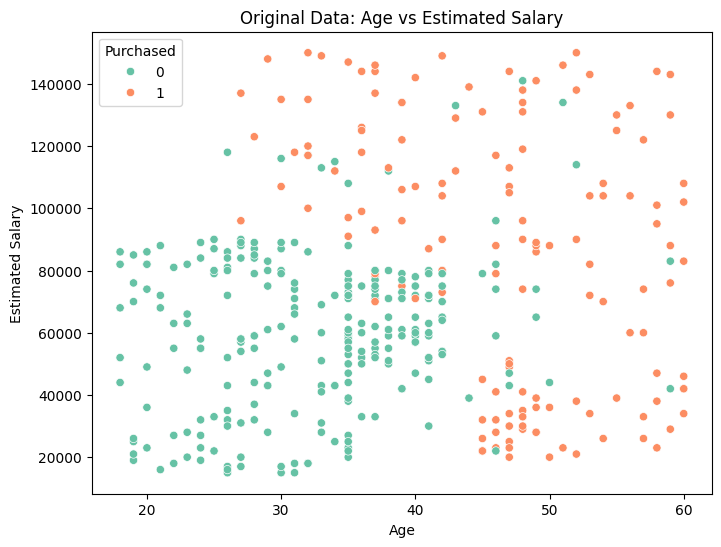

In [9]:
# Visualize the original data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Age'], y=X['EstimatedSalary'], hue=y, palette='Set2')
plt.title('Original Data: Age vs Estimated Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [10]:
# Load the dataset (replace 'Social_Network_Ads.csv' with your dataset filename if different)
data = pd.read_csv('Social_Network_Ads.csv')

# Display the first few rows
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
# Show basic info about the dataset
print('Shape:', data.shape)
print('Columns:', data.columns)
data.describe()

Shape: (400, 5)
Columns: Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## 3. Preprocess the Data

Before applying LDA, we need to handle missing values, encode categorical variables, and split the data into features and target.

In [12]:
# Example preprocessing (customize as needed for your dataset)
# Drop missing values
clean_data = data.dropna()

# Encode categorical variables if present
if 'Gender' in clean_data.columns:
    clean_data['Gender'] = clean_data['Gender'].map({'Male': 0, 'Female': 1})

# Select features and target (update column names as needed)
X = clean_data[['Age', 'EstimatedSalary']]
y = clean_data['Purchased']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Apply LDA (Linear Discriminant Analysis)

Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique. It projects data onto a lower-dimensional space to maximize class separation. Let's apply LDA to our training data.

In [13]:
# Fit LDA model and transform the data
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

print('Original feature shape:', X_train.shape)
print('LDA transformed shape:', X_train_lda.shape)

Original feature shape: (320, 2)
LDA transformed shape: (320, 1)


## Visualize LDA-Transformed Data

After applying LDA, let's visualize the transformed data to see how well the classes are separated in the new space. This helps us compare the effectiveness of LDA versus the original feature space.

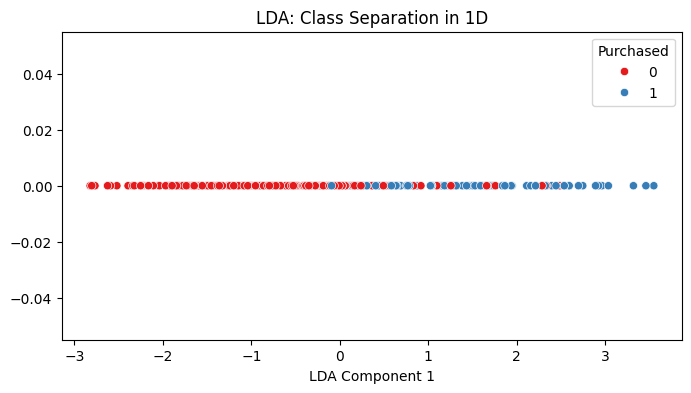

In [14]:
# Plot the LDA-transformed training data
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X_train_lda[:, 0], y=np.zeros_like(X_train_lda[:, 0]), hue=y_train, palette='Set1')
plt.xlabel('LDA Component 1')
plt.title('LDA: Class Separation in 1D')
plt.show()

## 6. Evaluate LDA Performance

Now, let's train a simple classifier on the LDA-transformed data and evaluate its performance using accuracy, confusion matrix, and classification report.

In [15]:
# Train a classifier (e.g., logistic regression) on LDA features
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

y_pred = clf.predict(X_test_lda)

# Evaluate performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8875
Confusion Matrix:
 [[50  2]
 [ 7 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



## Conclusion

- We started by visualizing the original data to understand its distribution and class separability.
- We mathematically and practically applied Linear Discriminant Analysis (LDA) for dimensionality reduction.
- We visualized the LDA-transformed data to observe improved class separation.
- Finally, we trained a machine learning algorithm (logistic regression) on the LDA features and evaluated its performance.

This workflow mirrors how LDA is taught in machine learning courses: from theory and visualization, through mathematical transformation, to direct application in ML algorithms. Experiment with other classifiers and datasets to further explore LDA's power!